## Import packages
-------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
#pip install plotly==3.10.0

In [3]:
#pip install plotly-express

In [4]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

In [5]:
data = pd.read_csv('monster_data.csv')

In [6]:
print('data dimensions: ',np.shape(data))

data dimensions:  (723, 23)


In [7]:
data.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Regigigas,Normal,NaN,670,110,160,110,80,110,...,White,False,NaN,Undiscovered,NaN,False,3.71,420.0,3,bipedal_tailless
1,2,Tyrantrum,Rock,Dragon,521,82,121,119,69,59,...,Red,True,0.875,Monster,Dragon,False,2.49,270.0,45,bipedal_tailed
2,3,Braviary,Normal,Flying,510,100,123,75,57,75,...,Red,True,1.000,Flying,NaN,False,1.50,41.0,60,two_wings
3,4,Tepig,Fire,NaN,308,65,63,45,45,45,...,Red,True,0.875,Field,NaN,False,0.51,9.9,45,quadruped
4,5,Luxray,Electric,NaN,523,80,120,79,95,79,...,Blue,True,0.500,Field,NaN,False,1.40,42.0,45,quadruped


### Checking for Outlier

In [8]:
px.scatter(data_frame = data, x = 'Defense',y = 'HP', color = 'Name')

### Checking for Dupilicates

In [9]:
data.loc[data.duplicated(subset=['Weight_kg', 'Height_m', 'Pr_Male', 'Defense','Sp_Atk','Sp_Def', 'Speed', 'Generation', 'Catch_Rate'], keep = False),:]

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
57,58,Sam,Water,NaN,308,55,55,45,63,45,...,Blue,True,0.875,Field,NaN,False,0.51,5.9,45,bipedal_tailed
72,73,Oshawott,Water,NaN,308,55,55,45,63,45,...,Blue,True,0.875,Field,NaN,False,0.51,5.9,45,bipedal_tailed


In [10]:
data.drop_duplicates(subset=['Weight_kg', 'Height_m', 'Pr_Male', 'Defense','Sp_Atk','Sp_Def', 'Speed', 'Generation', 'Catch_Rate'], inplace = True)

In [11]:
print('data dimensions: ',np.shape(data))

data dimensions:  (722, 23)


## Checking Missing Values
---------

In [12]:
data.isna().sum().sort_values(ascending = False)

Egg_Group_2         530
Type_2              371
Pr_Male              77
Body_Style            0
Sp_Def                0
Name                  0
Type_1                0
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Generation            0
Speed                 0
Catch_Rate            0
isLegendary           0
Color                 0
hasGender             0
Egg_Group_1           0
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Number                0
dtype: int64

In [13]:
data['Egg_Group_2'].value_counts()

Dragon        35
Grass         32
Field         31
Fairy         18
Water_3       15
Human-Like    15
Water_1       13
Water_2        8
Amorphous      8
Mineral        8
Flying         6
Bug            2
Monster        1
Name: Egg_Group_2, dtype: int64

In [14]:
data['Type_2'].value_counts()

Flying      87
Poison      31
Ground      30
Psychic     28
Steel       19
Fighting    19
Grass       18
Fairy       18
Dark        16
Dragon      14
Rock        14
Water       13
Ghost       12
Ice         10
Fire         9
Electric     6
Normal       4
Bug          3
Name: Type_2, dtype: int64

In [15]:
data['Pr_Male'].value_counts()

0.500    458
0.875    101
0.000     24
0.250     22
0.750     19
1.000     19
0.125      2
Name: Pr_Male, dtype: int64

In [16]:
data['Egg_Group_2'].fillna('None', inplace = True)
data['Type_2'].fillna('None', inplace = True)
data['Pr_Male'].fillna(0, inplace = True)

In [17]:
data.isna().sum().sort_values(ascending = False)

Body_Style          0
Speed               0
Name                0
Type_1              0
Type_2              0
Total               0
HP                  0
Attack              0
Defense             0
Sp_Atk              0
Sp_Def              0
Generation          0
Catch_Rate          0
isLegendary         0
Color               0
hasGender           0
Pr_Male             0
Egg_Group_1         0
Egg_Group_2         0
hasMegaEvolution    0
Height_m            0
Weight_kg           0
Number              0
dtype: int64

In [18]:
data.drop(['Number','Name'], axis = 1, inplace= True)

In [19]:
t_f_columns = ['isLegendary','hasGender','hasMegaEvolution']
data[t_f_columns] = data[t_f_columns].astype(int)

In [21]:
num_columns = ['Total','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Height_m','Weight_kg','Catch_Rate']
cat_columns = ['Type_1','Type_2','Color','Pr_Male','Egg_Group_1','Egg_Group_2','Body_Style']

data[cat_columns] = data[cat_columns].astype('category')

## Exploratory Data Analysis
--------

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,723.0,417.905947,109.629593,180.0,320.00,424.00,499.00,720.0
HP,723.0,68.573997,26.441981,1.0,50.00,65.00,80.00,255.0
Attack,723.0,74.907331,29.031333,5.0,53.00,73.00,95.00,165.0
Defense,723.0,70.994467,29.872072,5.0,50.00,65.00,85.00,231.0
Sp_Atk,723.0,68.804979,28.819659,10.0,45.00,65.00,90.00,154.0
Sp_Def,723.0,69.172891,27.089505,8.0,50.00,65.00,85.00,230.0
Speed,723.0,65.733057,27.280869,5.0,45.00,65.00,85.00,160.0
Generation,723.0,3.325035,1.668768,1.0,2.00,3.00,5.00,6.0
isLegendary,723.0,0.065007,0.246709,0.0,0.00,0.00,0.00,1.0
hasGender,723.0,0.892116,0.310448,0.0,1.00,1.00,1.00,1.0


###  Numerical Variables
------------

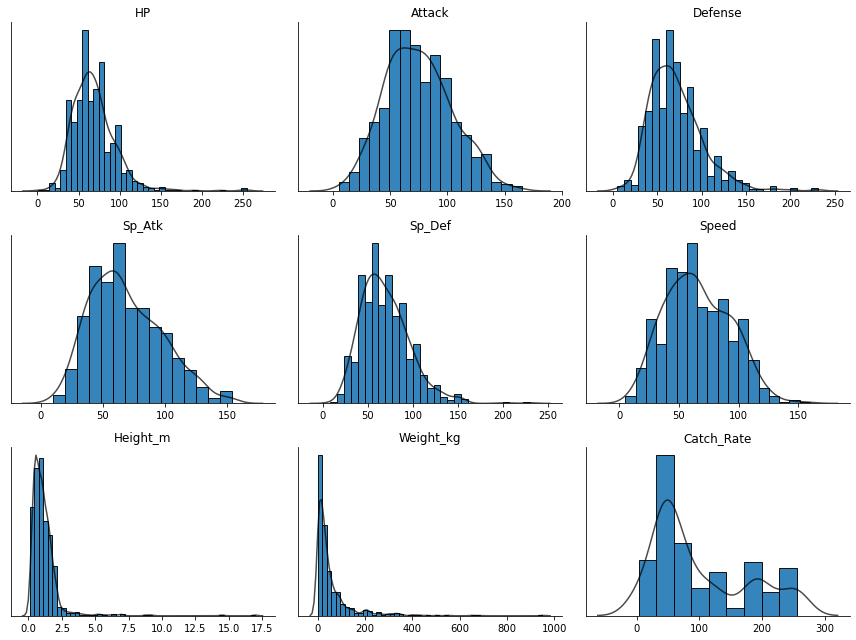

In [16]:
from statlearning import plot_dists
plot_dists(data[['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Height_m','Weight_kg','Catch_Rate']])
plt.show()

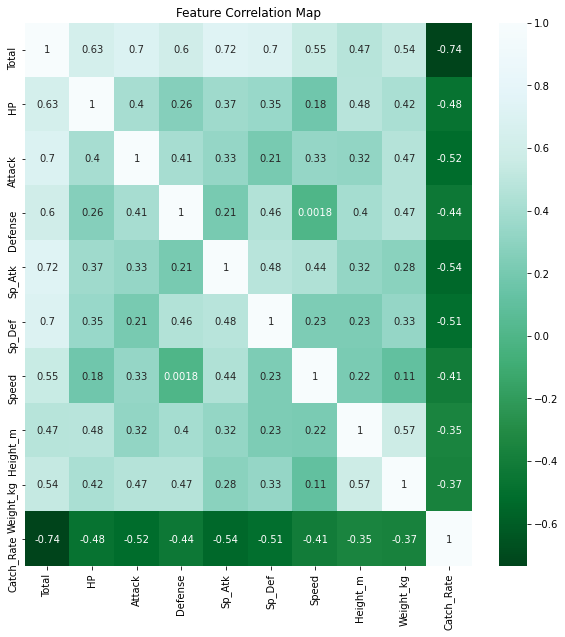

In [17]:
# Features correlation
plt.figure(figsize=(10,10))
sns.heatmap(data[num_columns].corr(),cmap="BuGn_r", annot=True);
plt.title("Feature Correlation Map");

In [19]:
trace0 = go.Box(y=data["HP"],name="HP")
trace1 = go.Box(y=data["Attack"],name="Attack")
trace2 = go.Box(y=data["Defense"],name="Defense")
trace3 = go.Box(y=data["Sp_Atk"],name="Sp_Atk")
trace4 = go.Box(y=data["Sp_Def"],name="Sp_Def")
trace5 = go.Box(y=data["Speed"],name="Speed")
trace6 = go.Box(y=data["Height_m"],name="Height_m")
trace7 = go.Box(y=data["Weight_kg"],name="Weight_kg")
trace8 = go.Box(y=data["Catch_Rate"],name="Catch_Rate")
data = [trace0, trace1, trace2,trace3, trace4, trace5, trace6, trace7, trace8]
iplot(data)

Numerical Varibles Distribution
Start by taking a look at the distributions of the numerical variables HP, Attack, Defense and so on.

- The variable 'HP', 'Height_m', 'Weight_krg' have a heavy right skew, generated because of the lower limit at zero of the variables. If I am using K-Means clustering, there will be no need to normalize the feature, but we may have to do so for other models.

### Categorical Variables
------------

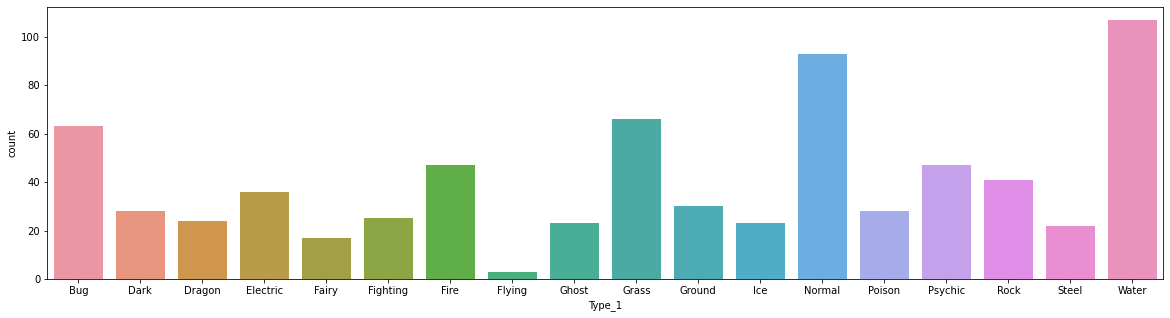

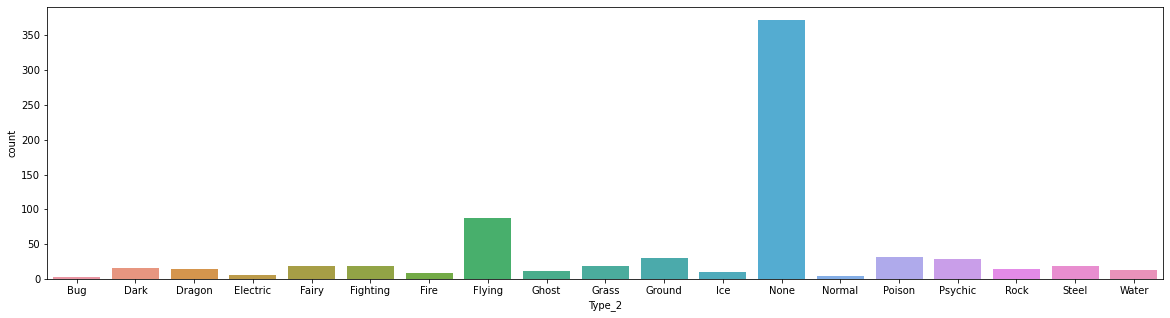

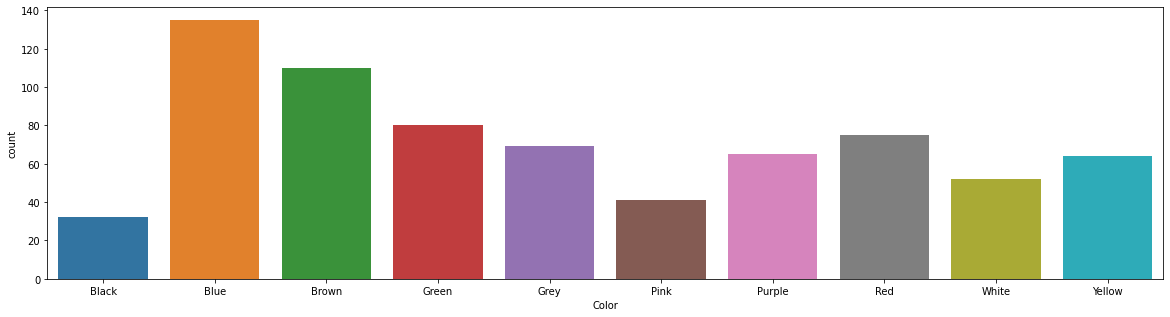

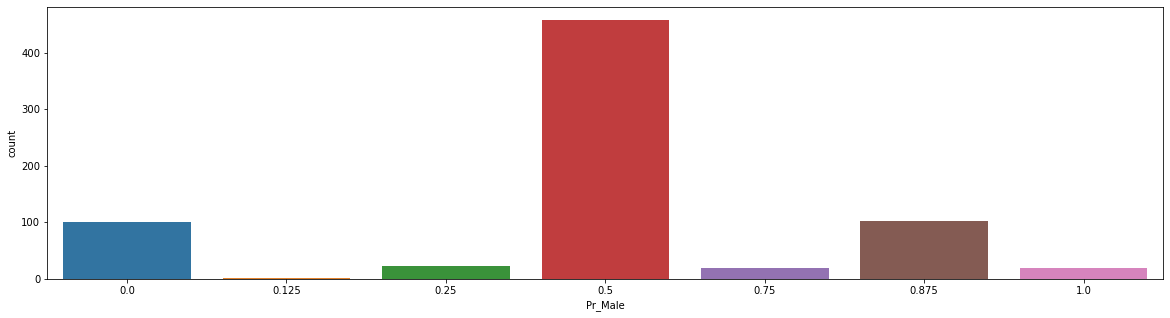

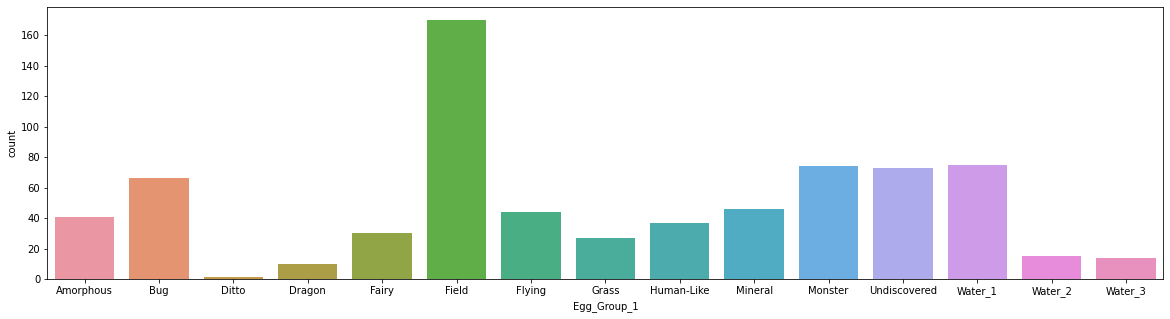

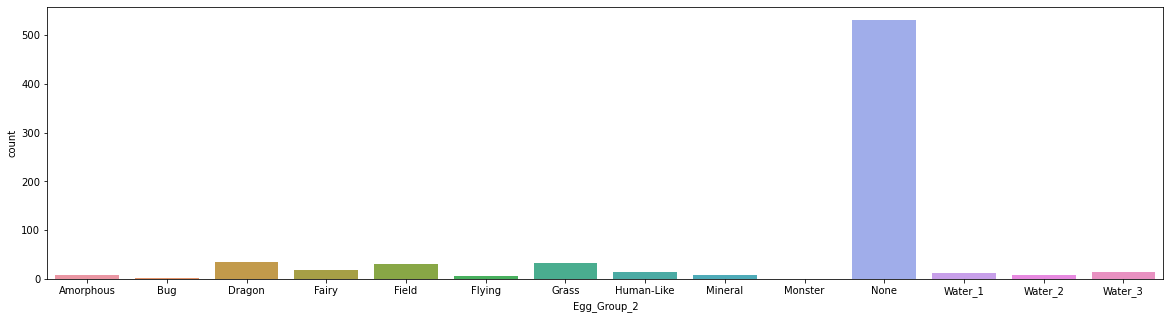

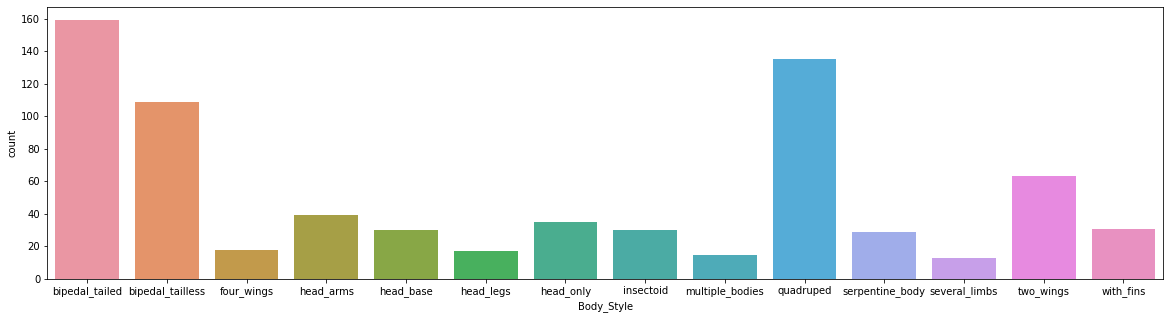

In [44]:
for category in cat_columns:
    plt.figure(figsize=(20,5))
    sns.countplot(data = data, x = category)

Categorical Variables Distribution
Take a look at categorical variables. Running univariant countplots, I reach the following conclusions:

- I could drop Type_2 and Egg_Group_2 due to sparse values domination.
- Most monsters have 0.5 for Pr_Male level, indeed quite interesting...

In [45]:
cat_aux = ['Type_1','Color','Pr_Male','Egg_Group_1','Body_Style']

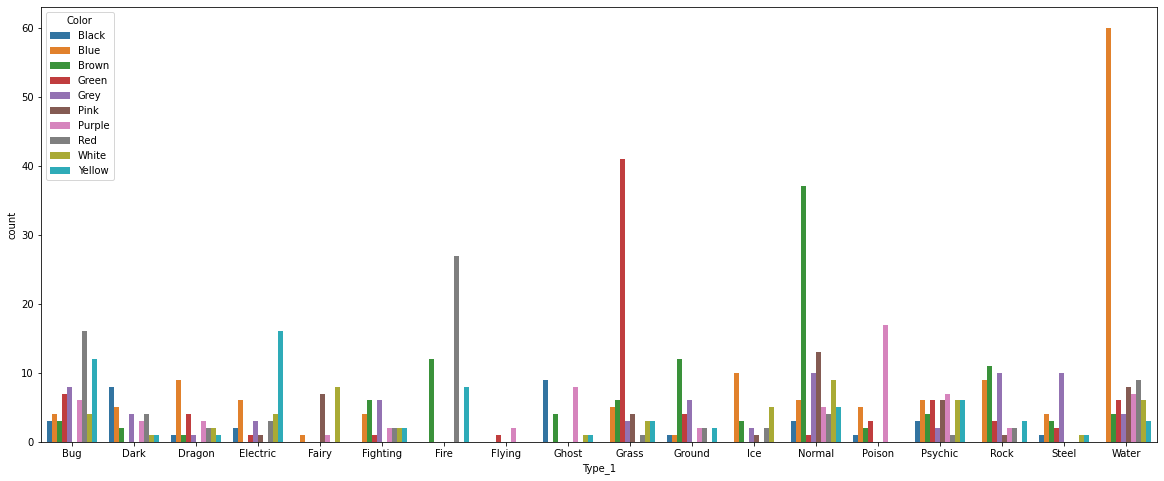

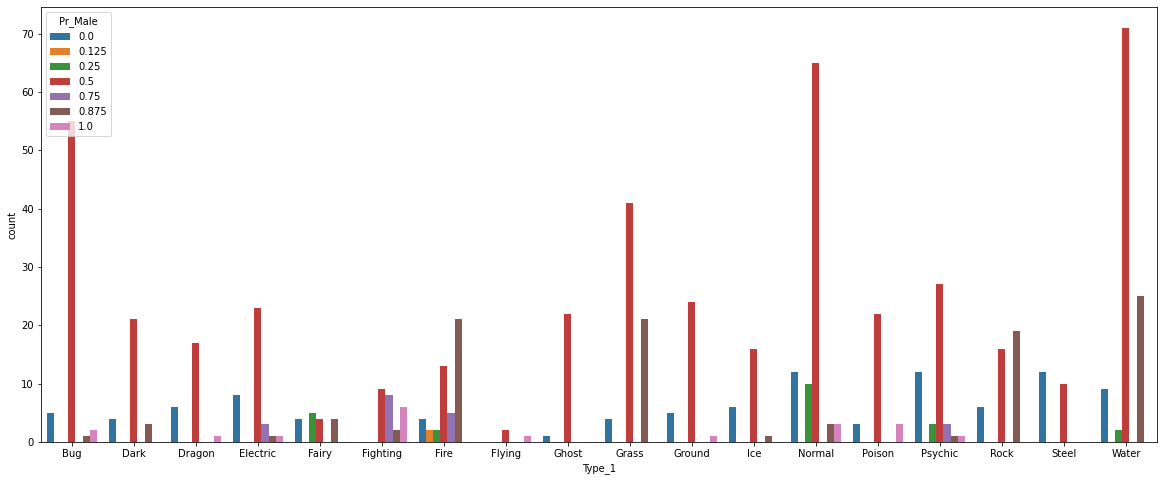

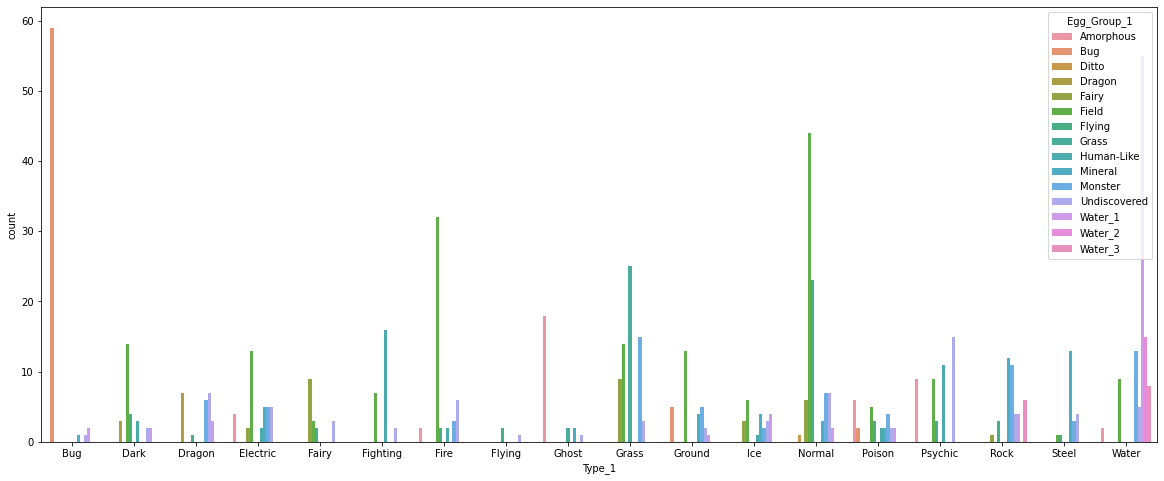

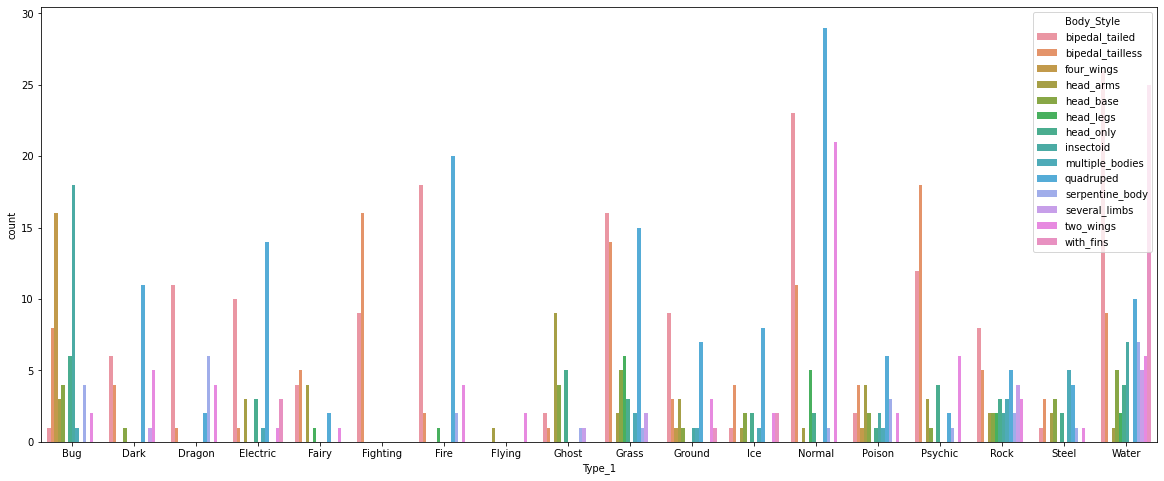

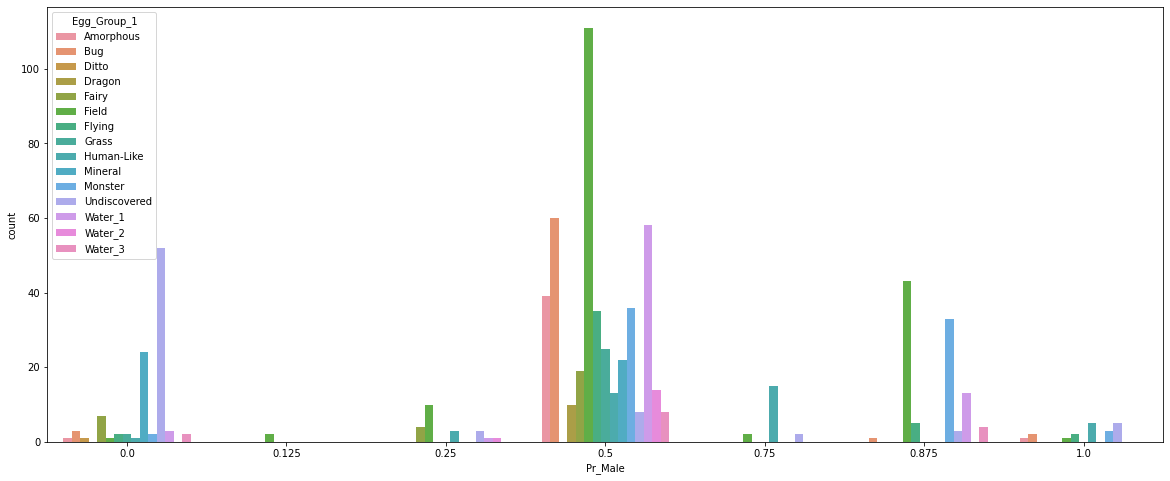

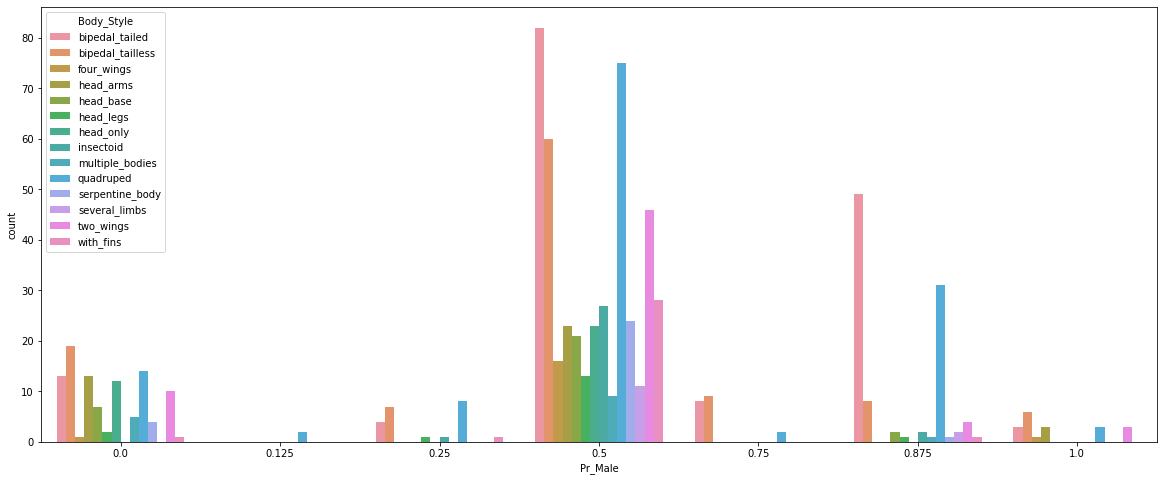

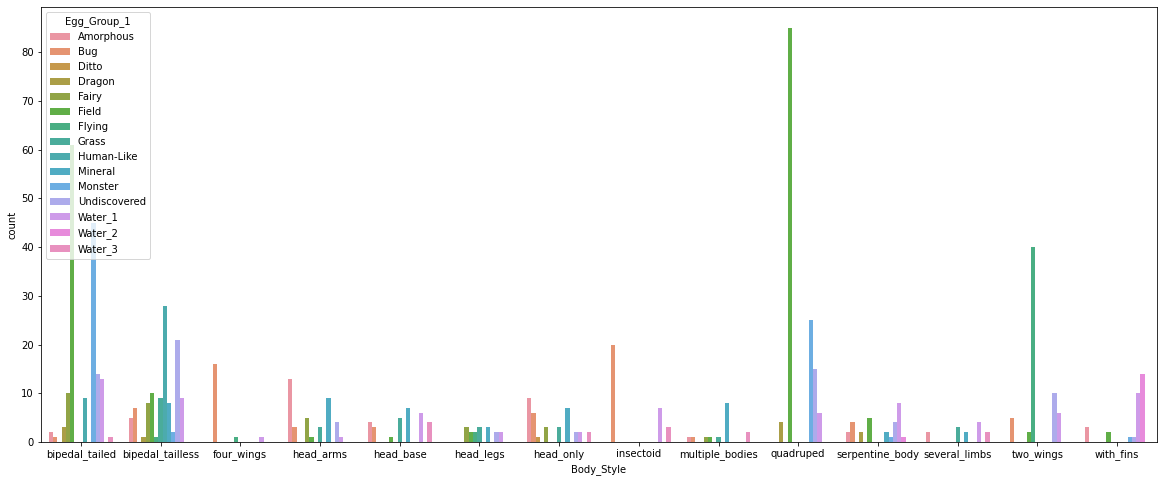

In [46]:
for category1 in cat_aux:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(20,8))
            sns.countplot(data=data, x=category1, hue=category2)

There are a few interesting relationships that can be drawn from the data:

- Monsters with Type_1 = 'Water' tend to have Blue color
- Still majority of monsters have ambigious gender

## Visualizing Pokemon
-----

In [22]:
categories = ['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Catch_Rate']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[222, 18, 231, 123, 8, 100, 5],
      theta=categories,
      fill='toself',
      name='Cassie'
))
fig.add_trace(go.Scatterpolar(
      r=[55, 55, 45, 63, 45, 45, 45],
      theta=categories,
      fill='toself',
      name='Sam'
))
layout = go.Layout(
        polar = dict(
        radialaxis = dict(
            visible = True,
            range = [0, 250]
        )
      ),
  showlegend=False
)

fig.show()

## Prepare for K-means Clustering
------------

In [23]:
data.drop(['Total'], axis = 1, inplace= True)

In [24]:
df = pd.get_dummies(data, drop_first=True)

In [25]:
df

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,hasMegaEvolution,...,Body_Style_head_base,Body_Style_head_legs,Body_Style_head_only,Body_Style_insectoid,Body_Style_multiple_bodies,Body_Style_quadruped,Body_Style_serpentine_body,Body_Style_several_limbs,Body_Style_two_wings,Body_Style_with_fins
0,110,160,110,80,110,100,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82,121,119,69,59,71,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,100,123,75,57,75,80,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,65,63,45,45,45,45,5,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,80,120,79,95,79,70,4,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,75,80,70,65,75,90,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
719,70,90,70,60,60,40,2,0,1,0,...,0,0,0,1,0,0,0,0,0,0
720,97,165,60,65,50,58,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
721,40,30,35,45,40,55,6,0,1,0,...,0,0,0,0,0,0,0,0,1,0


Since there are categorical features scaled between 0 and 1 ('isLegendasy' feature), we will use scikit learn's MinMaxScaler to scale out data between 0 and 1. 

In [26]:
# Rescale the x and y values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df)

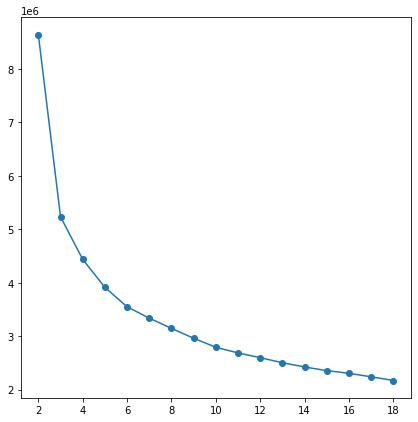

In [27]:
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

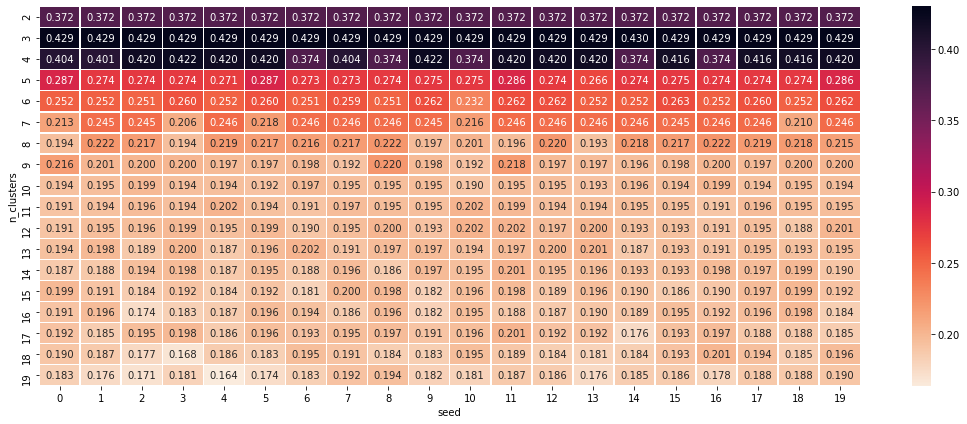

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=range(2, 20)
random_range  =range(0, 20)
results = []

for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters = c, random_state = r)
        cluster_labels = clusterer.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        results.append([c,r,silhouette_avg])

result  =pd.DataFrame(results, columns = ["n_clusters","seed","silhouette_score"])
pivot_km=pd.pivot_table(result, index = "n_clusters", columns = "seed",values = "silhouette_score")

plt.figure(figsize = (15, 6))
sns.heatmap(pivot_km, annot = True, linewidths = .5, fmt = '.3f', cmap = sns.cm.rocket_r)
plt.tight_layout()

From the graph shown above, I see that there is a spike in the Silhouette score for 5 clusters, which is coherent with the results I got from the elbow method. 

## Apply K-means with 4 and 5 clusters
--------

IndexError: list index out of range

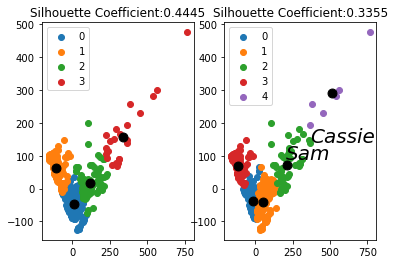

In [57]:
fig, ax = plt.subplots(1, 2)
ax = np.ravel(ax)
cluster_number = 4
for i in range(2):
    km = KMeans(n_clusters=cluster_number, random_state=0)
    labels = km.fit_predict(data)
    u_labels = np.unique(labels)
    centroids = km.cluster_centers_
    for j in u_labels:
        ax[i].scatter(data[labels == j , 0] , data[labels == j , 1] , label = j)
    ax[i].legend()
    ax[i].scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    ax[i].set_title('Silhouette Coefficient:' + str(silhouette_score(data, labels))[:6])
    cluster_number += 1

letters = ['Cassie', 'Sam']
for i in range(data.shape[0]):
    plt.text(data[i, 0] - 0.05, data[i, 1] - 0.04, letters[i], fontsize=20, color = 'Black', style = 'italic')